In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from seaborn import histplot
import time
import joblib

In [2]:
df = pd.read_csv(r'T:\toandangquoc\iuh_project_finals\data\data_train_model.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.fillna(0, inplace=True)
df.head()

,high,low,open,unix,cum_change,sma_7_up,sma_7,sma_7_low,ema_14,b_ma,bu,bl,cma_7,month,atr,year,ppo,close
date,,,,,,,,,,,,,,,,,,
2020-01-02,209.789993,206.270004,206.750000,1577923200,0.045198,210.794776,209.779999,207.655221,209.779999,217.042583,227.120132,206.965034,211.514287,1,3.519989,2020,0.000000,209.779999
2020-01-03,210.399994,206.949997,207.210007,1578009600,0.090156,210.794776,209.224998,207.655221,209.631999,217.042583,227.120132,206.965034,211.514287,1,3.514990,2020,-0.042226,208.669998
2020-01-04,211.193329,206.806666,207.040003,1578096000,0.135397,210.888098,209.476666,208.065234,209.678399,217.042583,227.120132,206.965034,211.514287,1,3.577252,2020,-0.024991,209.980001
2020-01-05,211.986664,206.663335,206.870000,1578182400,0.180920,212.078555,209.930000,207.781446,209.893280,217.042583,227.120132,206.965034,211.514287,1,3.701972,2020,0.038602,211.290003
2020-01-06,212.779999,206.520004,206.699997,1578268800,0.226725,213.491436,210.464001,207.436567,210.254176,217.042583,227.120132,206.965034,211.514287,1,3.884688,2020,0.137642,212.600006


In [3]:
split_ratio = 0.8
cut_off = int(len(df) * split_ratio)
train_sarimax = df[:cut_off]
test_sarimax = df[cut_off:]
X_train_sarimax = train_sarimax.drop(['close'], axis=1)
X_test_sarimax = test_sarimax.drop(['close'], axis=1)
y_train_sarimax = train_sarimax['close']
y_test_sarimax = test_sarimax['close']

In [4]:
model  = auto_arima(y=y_train_sarimax,
                    X=X_train_sarimax,
                    m = 7,
                    max_P=5,
                    max_Q=5,
                    seasonal=True,
                    test='adf',
                    alpha=0.05,              
                    d=None,                  
                    D=None,
                    error_action='ignore',
                    suppress_warnings=True, 
                    trace=True,
                    scoring='mse')
orders, seasonal_orders = model.order, model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=5403.590, Time=2.21 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5517.234, Time=0.84 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5408.521, Time=1.54 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5416.246, Time=1.77 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=13810.404, Time=0.81 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=5401.795, Time=2.44 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=5400.042, Time=1.57 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=5401.724, Time=2.12 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=5404.296, Time=1.19 sec


c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=5529.035, Time=1.11 sec
 ARIMA(3,0,2)(0,0,0)[7] intercept   : AIC=5400.988, Time=1.31 sec
 ARIMA(2,0,3)(0,0,0)[7] intercept   : AIC=5403.582, Time=1.47 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=5408.052, Time=1.09 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=5401.255, Time=1.32 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : AIC=5399.105, Time=1.69 sec
 ARIMA(3,0,1)(1,0,0)[7] intercept   : AIC=5400.991, Time=2.29 sec
 ARIMA(3,0,1)(0,0,1)[7] intercept   : AIC=5401.180, Time=2.40 sec
 ARIMA(3,0,1)(1,0,1)[7] intercept   : AIC=5402.976, Time=3.32 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=5397.210, Time=1.96 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=5399.158, Time=2.45 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=5399.383, Time=2.11 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=5401.174, Time=3.37 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=5407.325, Time=1.33 sec
 ARIMA(4,0,0)(0,0,0)[7] intercept   : AIC=5399.115, Time=2.90 sec
 ARIMA(4,0

c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[7]             : AIC=5527.035, Time=1.46 sec
 ARIMA(4,0,1)(0,0,0)[7]             : AIC=5399.289, Time=2.15 sec

Best model:  ARIMA(3,0,0)(0,0,0)[7]          
Total fit time: 66.422 seconds


In [5]:
model_sarimax = SARIMAX(
            endog=y_train_sarimax,
            exog=X_train_sarimax,
            order=orders,
            seasonal_order=seasonal_orders,
            freq='D',
            trend=None,
            enforce_stationarity=False,
            enforce_invertibility=False,
            mle_regression=True
        )
model_fit = model_sarimax.fit(disp=0)
print("Model's AIC = {:.4f}".format(model_fit.aic))
print(model_fit.summary())

c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model's AIC = 5385.9485
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1338
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2671.974
Date:                Sun, 15 Dec 2024   AIC                           5385.949
Time:                        03:54:21   BIC                           5495.079
Sample:                    01-02-2020   HQIC                          5426.841
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
high           0.7617   9.68e-05   7867.085      0.000       0.761       0.762
low            0.7700   9.57e-05   8043.440      0.000       0.770       0.770
open          -0.5945   9.67

c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
forecasts = model_fit.predict(start=y_test_sarimax.index[0], end=y_test_sarimax.index[-1], exog=X_test_sarimax, dynamic=True)

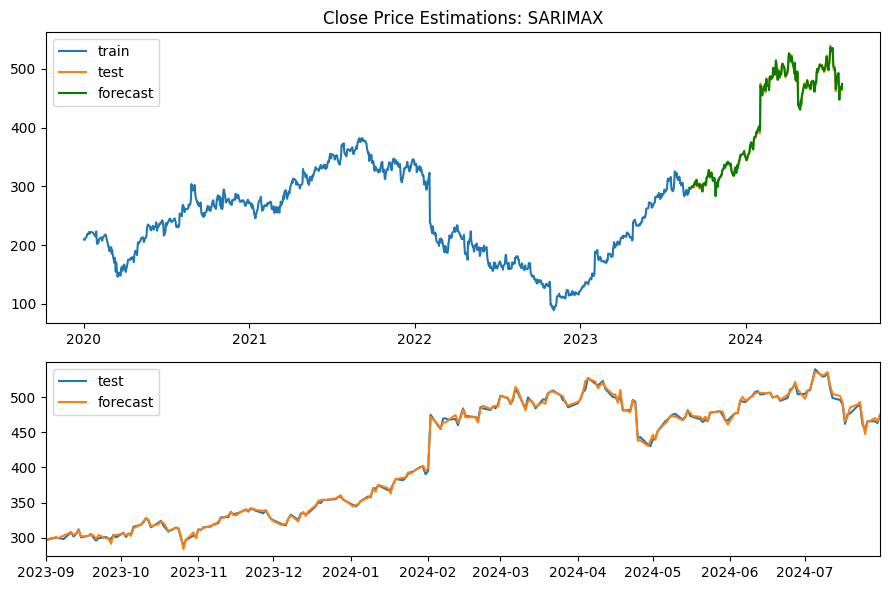

In [7]:
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 1]})
axes[0].plot(y_train_sarimax, label='train')
axes[0].plot(y_test_sarimax, linewidth=1.5, label='test')
axes[0].plot(forecasts, color='green', label='forecast')
axes[0].set_title('Close Price Estimations: SARIMAX')
axes[0].legend()

axes[1].plot(y_test_sarimax, linewidth=1.5, label='test')
axes[1].plot(forecasts, label='forecast')
axes[1].set_xlim(y_test_sarimax.index[0], y_test_sarimax.index[-1])
axes[1].set_ylim(min(y_test_sarimax.min(), forecasts.min()) - 10, max(y_test_sarimax.max(), forecasts.max()) + 10)
axes[1].legend()

In [8]:
def cross_val_sarimax(data, orders, seasonal_orders, k=6, test_data=True):
        '''
        Returns k-fold cross-validation score (RMSE).

        '''
        tscv = TimeSeriesSplit(n_splits=k)
        cv_scores = []
        
        for train_index, test_index in tscv.split(data):
            # set endogenous & exogenous variables
            cv_endog_train, cv_endog_test = data.iloc[train_index, -1:], data.iloc[test_index, -1:]
            cv_exog_train, cv_exog_test = data.iloc[train_index, :-1], data.iloc[test_index, :-1]
            
            mod = SARIMAX(
                endog=cv_endog_train,
                exog=cv_exog_train,
                order=orders,
                seasonal_order=seasonal_orders,
                freq='D',
                trend=None,
                enforce_stationarity=False,
                enforce_invertibility=False,
                mle_regression=True
            ).fit()
            
            # get scores & append to list
            forecasts = mod.predict(start=cv_endog_test.index[0], end=cv_endog_test.index[-1], exog=cv_exog_test, dynamic=True)
            rmse = np.sqrt(mean_squared_error(cv_endog_test, forecasts))
            cv_scores.append(rmse)
            
        return np.mean(cv_scores)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test_sarimax, forecasts))
cv_rmse = cross_val_sarimax(df, orders, seasonal_orders)
r2 = r2_score(y_test_sarimax, forecasts)
mae = mean_absolute_error(y_test_sarimax, forecasts)
mape = mean_absolute_percentage_error(y_test_sarimax, forecasts)

c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DANG QUOC TOAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [10]:
print('Testing performance:')
print('--------------------')
print('RMSE: {:.4f}'.format(rmse))
print('6-fold CV: {:.4f}'.format(cv_rmse))
print('R2: {:.4f}'.format(r2))
print('MAE: {:.4f}'.format(mae))
print('MAPE: {:.4f}%'.format(mape))

Testing performance:
--------------------
RMSE: 2.7048
6-fold CV: 2.4136
R2: 0.9989
MAE: 2.0341
MAPE: 0.0049%


In [11]:
residual_train = model_fit.resid
residual_test = y_test_sarimax - forecasts

In [12]:
print("Shape Train Sarimax = ", train_sarimax.shape)
print("Shape Test Sarimax = ", test_sarimax.shape)
print("Shape residual train = ", residual_train.shape)
print("Shape residual test = ", residual_test.shape)

Shape Train Sarimax =  (1338, 18)
Shape Test Sarimax =  (335, 18)
Shape residual train =  (1338,)
Shape residual test =  (335,)


In [13]:
residual = pd.concat([residual_train, residual_test])

In [14]:
residual

date
2020-01-02    2.895774e-09
2020-01-03   -1.349094e-01
2020-01-04    6.540895e-01
2020-01-05    1.156300e+00
2020-01-06    1.607862e+00
                  ...     
2024-07-27   -5.716612e-01
2024-07-28   -2.470708e+00
2024-07-29   -4.642225e+00
2024-07-30   -2.541070e+00
2024-07-31    6.925740e-01
Length: 1673, dtype: float64

In [15]:
df_all_data = pd.read_csv(r'T:\toandangquoc\iuh_project_finals\data\TSLA_All.csv')
df_all_data['date'] = pd.to_datetime(df_all_data['date'])
df_all_data.set_index('date', inplace=True)
df_all_data.fillna(0, inplace=True)
df_all_data = df_all_data.drop(columns = 'Unnamed: 0')
df_all_data.head()

,close,high,low,open,volume,year,quarter,month,day,dayofweek,...,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_numeric,esp,P/E
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,209.779999,209.789993,206.270004,206.750000,1.207710e+07,2020,1,1,2,3,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,0.000000,1.0,0.163561,1282.579637
2020-01-03,208.669998,210.399994,206.949997,207.210007,1.118840e+07,2020,1,1,3,4,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.042226,1.0,0.176553,1181.913237
2020-01-04,209.980001,211.193329,206.806666,207.040003,1.314523e+07,2020,1,1,4,5,...,208.065234,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.024991,0.0,0.150271,1397.345602
2020-01-05,211.290003,211.986664,206.663335,206.870000,1.510207e+07,2020,1,1,5,6,...,207.781446,76.380818,92.364923,94.661666,-7.635077,77.658178,0.038602,0.0,0.130799,1615.373422
2020-01-06,212.600006,212.779999,206.520004,206.699997,1.705890e+07,2020,1,1,6,0,...,207.436567,76.380818,92.364923,94.661666,-7.635077,77.658178,0.137642,0.0,0.115795,1835.996698


In [16]:
residual

date
2020-01-02    2.895774e-09
2020-01-03   -1.349094e-01
2020-01-04    6.540895e-01
2020-01-05    1.156300e+00
2020-01-06    1.607862e+00
                  ...     
2024-07-27   -5.716612e-01
2024-07-28   -2.470708e+00
2024-07-29   -4.642225e+00
2024-07-30   -2.541070e+00
2024-07-31    6.925740e-01
Length: 1673, dtype: float64

In [17]:
df_all_data['residual'] = residual
df_all_data.head()

,close,high,low,open,volume,year,quarter,month,day,dayofweek,...,rsi,k,d,wr,cci,ppo,sentiment_numeric,esp,P/E,residual
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,209.779999,209.789993,206.270004,206.750000,1.207710e+07,2020,1,1,2,3,...,76.380818,92.364923,94.661666,-7.635077,77.658178,0.000000,1.0,0.163561,1282.579637,2.895774e-09
2020-01-03,208.669998,210.399994,206.949997,207.210007,1.118840e+07,2020,1,1,3,4,...,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.042226,1.0,0.176553,1181.913237,-1.349094e-01
2020-01-04,209.980001,211.193329,206.806666,207.040003,1.314523e+07,2020,1,1,4,5,...,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.024991,0.0,0.150271,1397.345602,6.540895e-01
2020-01-05,211.290003,211.986664,206.663335,206.870000,1.510207e+07,2020,1,1,5,6,...,76.380818,92.364923,94.661666,-7.635077,77.658178,0.038602,0.0,0.130799,1615.373422,1.156300e+00
2020-01-06,212.600006,212.779999,206.520004,206.699997,1.705890e+07,2020,1,1,6,0,...,76.380818,92.364923,94.661666,-7.635077,77.658178,0.137642,0.0,0.115795,1835.996698,1.607862e+00


In [18]:
df_all_data.to_csv(r'T:\toandangquoc\iuh_project_finals\data\residual.csv')

In [19]:
# Check mối tương quan giữa các feature
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_regression


# split dataset into features and target
X = df_all_data.loc[:, df_all_data.columns != 'residual'].fillna(0)
y = df_all_data['residual']
# top k features
def select_kbest(k=10):
    '''
    Computes feature selection scores, correlations, p-values, and plots results.
    '''
    pearson_corr = []
    spearman_corr = []
    p_values = []

    for i in range(0, X.shape[1]):
        pearson_corr.append(pearsonr(X.iloc[:, i], y)[0])
        spearman_corr.append(spearmanr(X.iloc[:, i], y)[0])
        p_values.append(pearsonr(X.iloc[:, i], y)[1])
    
    # build feature selector
    feature_selector = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores['Feature'] = X.columns
    feat_scores['F-score'] = feature_selector.scores_
    feat_scores['Support'] = feature_selector.get_support()
    feat_scores['Pearson'] = pearson_corr
    feat_scores['Spearman'] = spearman_corr
    feat_scores['P-value'] = p_values
    
    feat_scores.sort_values(by='F-score', ascending=False, inplace=True)
    
    return feat_scores

kbest_res = select_kbest(k=15)
kbest_res.style.hide(axis='index')

Feature,F-score,Support,Pearson,Spearman,P-value
high_close,0.254037,True,-0.540249,-0.636098,0.000000
atr,0.134221,True,-0.043251,-0.031227,0.076963
daily_return,0.123224,True,0.344367,0.397826,0.000000
close_change,0.122095,True,0.334709,0.390981,0.000000
year_change,0.112630,True,0.374851,0.420639,0.000000
close,0.098262,True,-0.068233,-0.032367,0.005237
k,0.090733,True,0.190232,0.233049,0.000000
wr,0.090628,True,0.190232,0.233049,0.000000
market_cap,0.088714,True,0.022636,0.011391,0.354822
open,0.085626,True,-0.085801,-0.054666,0.000443


In [20]:
# top percent features
def select_percentile(percentile=40):
    '''
    Computes feature selection scores, correlations, p-values, and plots results.
    '''
    pearson_corr = []
    spearman_corr = []
    p_values = []

    for i in range(0, X.shape[1]):
        pearson_corr.append(pearsonr(X.iloc[:, i], y)[0])
        spearman_corr.append(spearmanr(X.iloc[:, i], y)[0])
        p_values.append(pearsonr(X.iloc[:, i], y)[1])
    
    # build feature selector
    feature_selector = SelectPercentile(score_func=mutual_info_regression, percentile=percentile).fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores['Feature'] = X.columns
    feat_scores['F-score'] = feature_selector.scores_
    feat_scores['Support'] = feature_selector.get_support()
    feat_scores['Pearson'] = pearson_corr
    feat_scores['Spearman'] = spearman_corr
    feat_scores['P-value'] = p_values
    
    feat_scores.sort_values(by='F-score', ascending=False, inplace=True)
    
    return feat_scores

percentile_res = select_percentile(percentile=40)
percentile_res.style.hide(axis='index')

Feature,F-score,Support,Pearson,Spearman,P-value
high_close,0.254037,True,-0.540249,-0.636098,0.000000
atr,0.134221,True,-0.043251,-0.031227,0.076963
daily_return,0.123224,True,0.344367,0.397826,0.000000
close_change,0.122275,True,0.334709,0.390981,0.000000
year_change,0.112630,True,0.374851,0.420639,0.000000
close,0.098330,True,-0.068233,-0.032367,0.005237
k,0.090634,True,0.190232,0.233049,0.000000
wr,0.090590,True,0.190232,0.233049,0.000000
market_cap,0.088714,True,0.022636,0.011391,0.354822
open,0.085632,True,-0.085801,-0.054666,0.000443


In [21]:
# export variables, add 'close', and remove unwanted 'cycle'
selected_features = percentile_res.query('`Support` == True')['Feature'].tolist()
selected_features.append('residual')

# export data
df_final = df_all_data.loc[:, selected_features]
try:
    df_final.to_csv(r'T:\toandangquoc\iuh_project_finals\data\train_residual_model.csv', index=True)
except:
    print('Something went wrong')

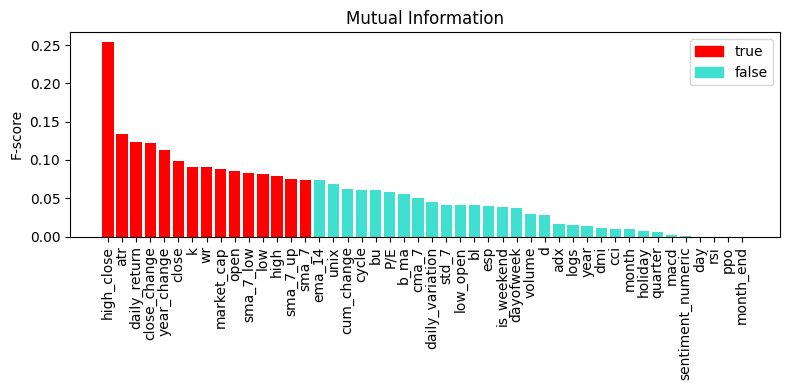

In [22]:
# mutual information results
def plot_results(data):
    '''
    Returns bar plot of scores for each feature.
    '''
    plt.figure(figsize=(8, 4), tight_layout=True)
    colors_ = ['red' if (bar == True) else 'turquoise' for bar in data['Support']]
    
    plt.bar(x=data['Feature'], height=data['F-score'], color=colors_)
    plt.title('Mutual Information')
    plt.ylabel('F-score')
    plt.xticks(rotation=90)
    
    # legend settings
    mask_colors = {'true': 'red', 'false': 'turquoise'}
    labels = list(mask_colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=mask_colors[label]) for label in labels]
    plt.legend(handles, labels)
    
    plt.show()
    
plot_results(kbest_res)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from seaborn import histplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
import joblib
import xgboost as xgb

In [24]:
df = pd.read_csv(r'T:\toandangquoc\iuh_project_finals\data\train_residual_model.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.fillna(0, inplace=True)
df.head()

,high_close,atr,daily_return,close_change,year_change,close,k,wr,market_cap,open,sma_7_low,low,high,sma_7_up,sma_7,ema_14,unix,cum_change,residual
date,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000048,3.519989,-0.005291,-1.110001,1.465537,209.779999,92.364923,-7.635077,2.533534e+09,206.750000,207.655221,206.270004,209.789993,210.794776,209.779999,209.779999,1577923200,0.045198,2.895774e-09
2020-01-03,0.008349,3.514990,-0.005291,-1.110001,0.704595,208.669998,92.364923,-7.635077,2.334683e+09,207.210007,207.655221,206.949997,210.399994,210.794776,209.224998,209.631999,1578009600,0.090156,-1.349094e-01
2020-01-04,0.005860,3.577252,0.006278,1.310003,1.420014,209.980001,92.364923,-7.635077,2.760236e+09,207.040003,208.065234,206.806666,211.193329,210.888098,209.476666,209.678399,1578096000,0.135397,6.540895e-01
2020-01-05,0.003368,3.701972,0.006239,1.310003,2.136609,211.290003,92.364923,-7.635077,3.190916e+09,206.870000,207.781446,206.663335,211.986664,212.078555,209.930000,209.893280,1578182400,0.180920,1.156300e+00
2020-01-06,0.000871,3.884688,0.006200,1.310003,2.854383,212.600006,92.364923,-7.635077,3.626722e+09,206.699997,207.436567,206.520004,212.779999,213.491436,210.464001,210.254176,1578268800,0.226725,1.607862e+00


In [25]:
from statsmodels.tsa.stattools import adfuller

opt_lags = adfuller(df['close'], autolag='AIC')[2]

print('Number of lags:', opt_lags)

Number of lags: 0


In [26]:
cut_off = int(len(df) * 0.8)
train = df[:cut_off]
test = df[cut_off:]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
train_scale = scaler.fit_transform(train)
test_scale = scaler.fit_transform(test)

In [29]:
X_train, y_train = train_scale[:, :-1], train_scale[:, -1].reshape(-1, 1)
X_test, y_test = test_scale[:, :-1], test_scale[:, -1].reshape(-1, 1)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 18) (1338, 1)
(335, 18) (335, 1)


In [31]:
from xgboost import XGBRegressor

xgb_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate' : [0.001, 0.01],
    'n_estimators': [1000]
}

In [32]:
xgb_model = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid, verbose=1)
# fit regressor
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
xgb_kwargs = xgb_model.best_params_
print('\nBest parameters for XGBoosting:\n', xgb_kwargs)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for XGBoosting:
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}


In [33]:
xgb_predictions = xgb_model.predict(X_test).reshape(-1, 1)
xgb_pred_copies = np.repeat(xgb_predictions, test.shape[1], axis=-1)

xgb_pred = scaler.inverse_transform(xgb_pred_copies)[:, 0]
xgb_pred

array([0.01814834, 0.0195777 , 0.02076311, 0.02161467, 0.02300238,
       0.02078187, 0.01468062, 0.01703684, 0.01800686, 0.020702  ,
       0.02327009, 0.0170245 , 0.02149048, 0.02334207, 0.01545034,
       0.01930814, 0.02062822, 0.02332901, 0.02326911, 0.01666526,
       0.01921664, 0.01769811, 0.02077538, 0.02224381, 0.02611685,
       0.02345661, 0.02339302, 0.02174168, 0.0092291 , 0.01698956,
       0.01998592, 0.02489777, 0.01806737, 0.02342559, 0.02468959,
       0.02623507, 0.0245701 , 0.02357675, 0.02216702, 0.02033944,
       0.02478203, 0.01707609, 0.01301408, 0.01709985, 0.01960068,
       0.02533241, 0.02496257, 0.01462501, 0.01750605, 0.0187876 ,
       0.01887727, 0.02003756, 0.02033838, 0.01943436, 0.01469991,
       0.02091437, 0.02168316, 0.02114522, 0.01827403, 0.0160856 ,
       0.02436451, 0.02593403, 0.01854466, 0.02417588, 0.0225896 ,
       0.02191519, 0.02142491, 0.02138666, 0.02233117, 0.01998111,
       0.02657911, 0.02333958, 0.02161809, 0.01960413, 0.02259

In [34]:
forecasts

2023-09-01    296.451025
2023-09-02    298.060407
2023-09-03    299.298263
2023-09-04    299.804800
2023-09-05    300.393652
                 ...    
2024-07-27    466.275000
2024-07-28    468.177373
2024-07-29    470.352216
2024-07-30    465.731072
2024-07-31    474.137413
Freq: D, Name: predicted_mean, Length: 335, dtype: float64

In [35]:
forecasts_updated = forecasts + xgb_pred

In [36]:
forecasts_updated

2023-09-01    296.469173
2023-09-02    298.079985
2023-09-03    299.319026
2023-09-04    299.826415
2023-09-05    300.416654
                 ...    
2024-07-27    466.289049
2024-07-28    468.191734
2024-07-29    470.367202
2024-07-30    465.745209
2024-07-31    474.161970
Freq: D, Name: predicted_mean, Length: 335, dtype: float64

In [37]:
rmse = np.sqrt(mean_squared_error(y_test_sarimax, forecasts_updated))
# cv_rmse = cross_val_sarimax(data, orders, seasonal_orders)
r2 = r2_score(y_test_sarimax, forecasts_updated)
mae = mean_absolute_error(y_test_sarimax, forecasts_updated)
mape = mean_absolute_percentage_error(y_test_sarimax, forecasts_updated)

In [38]:
print('Testing performance:')
print('--------------------')
print('RMSE: {:.4f}'.format(rmse))
# print('6-fold CV: {:.4f}'.format(cv_rmse))
print('R2: {:.4f}'.format(r2))
print('MAE: {:.4f}'.format(mae))
print('MAPE: {:.4f}%'.format(mape))

Testing performance:
--------------------
RMSE: 2.7052
R2: 0.9989
MAE: 2.0348
MAPE: 0.0049%


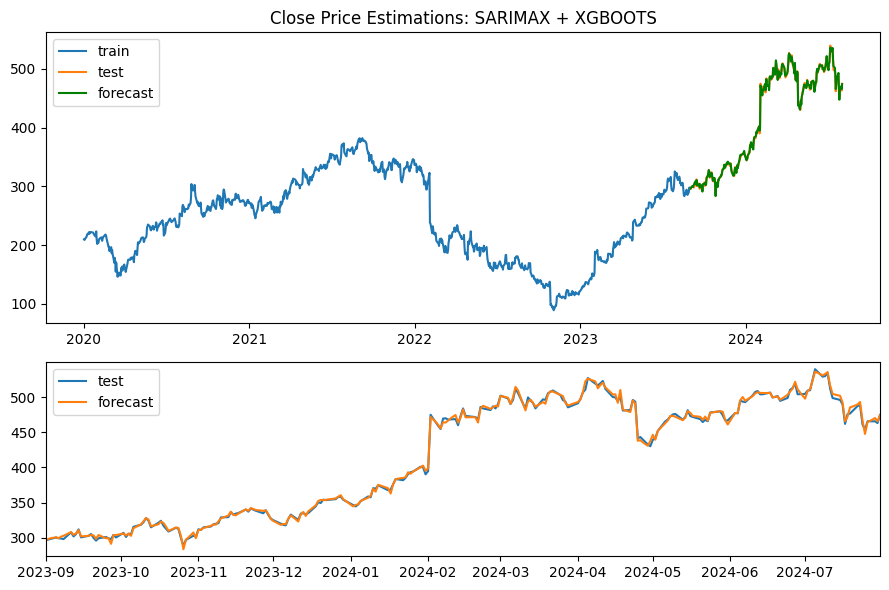

In [39]:
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 1]})
axes[0].plot(y_train_sarimax, label='train')
axes[0].plot(y_test_sarimax, linewidth=1.5, label='test')
axes[0].plot(forecasts, color='green', label='forecast')
axes[0].set_title('Close Price Estimations: SARIMAX + XGBOOTS')
axes[0].legend()

axes[1].plot(y_test_sarimax, linewidth=1.5, label='test')
axes[1].plot(forecasts_updated, label='forecast')
axes[1].set_xlim(y_test_sarimax.index[0], y_test_sarimax.index[-1])
axes[1].set_ylim(min(y_test_sarimax.min(), forecasts_updated.min()) - 10, max(y_test_sarimax.max(), forecasts_updated.max()) + 10)
axes[1].legend()

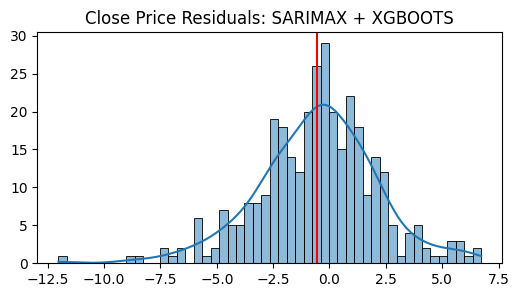

In [40]:
def diagnostics(y_test, forecasts):
        resid = y_test - forecasts

        # plot residuals
        plt.figure(figsize=(6, 3))

        histplot(x=resid, kde=True, bins=50)
        plt.axvline(x=resid.mean(), color='red') 
        plt.title('Close Price Residuals: SARIMAX + XGBOOTS')
        plt.xlabel(None)
        plt.ylabel(None)

        plt.show()

diagnostics(y_test_sarimax, forecasts_updated)